<a href="https://colab.research.google.com/github/wabinyai/AIRQO-web/blob/master/%5B06_APRIL_2022%5DMAPING_KIRA_AirQloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pearlgeoportal.com/sector/Kampala-City-and-Greater-Kampala/shapefiles

In [1]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 16.7 MB 35.4 MB/s 
     |████████████████████████████████| 6.3 MB 31.2 MB/s 


In [2]:
import pandas as pd
import geopandas as gps
import folium
import matplotlib.pyplot as plt
from google.colab import files

In [20]:
uploaded = files.upload()
for fn in uploaded.keys():
  print ('Avacado dataset'.format(
      name=fn, length=len(uploaded[fn])
  ))

Saving GreaterKampalaMetropolitanAreaParishes903.zip to GreaterKampalaMetropolitanAreaParishes903.zip
Avacado dataset


In [30]:
geo_df = gps.read_file(fn)
geo_df

,OBJECTID,DCODE,CCODE,SCODE,PCODE,DISTRICT,COUNTY,SUBCOUNTY,PARISH,UNITCODE,growth_tre,Shape_Leng,Status,Shape_Le_1,Shape_Area,geometry
0,1,30,2,8,9,MPIGI,BUSIRO,WAKISO,LUKWANGA,302809.0,Moderate,19112.680131,Greater Kampala,19112.680131,1.834125e+07,"POLYGON ((438141.506 43717.856, 438261.289 436..."
1,2,30,5,6,1,MPIGI,KYADONDO,NANGABO,BULAMU,305601.0,Rapid,12972.447079,Greater Kampala,12972.447079,8.207346e+06,"POLYGON ((459419.568 49032.490, 459412.474 489..."
2,3,30,5,6,6,MPIGI,KYADONDO,NANGABO,MASOOLI,305606.0,Moderate,11114.923378,Greater Kampala,11114.923378,7.207308e+06,"POLYGON ((454683.953 49080.361, 454689.828 490..."
3,4,30,5,6,8,MPIGI,KYADONDO,NANGABO,WAMPEWO,305608.0,Moderate,14589.360701,Greater Kampala,14589.360701,8.424759e+06,"POLYGON ((458061.044 46727.750, 457975.698 466..."
4,5,30,5,2,4,MPIGI,KYADONDO,KIRA,KIRA,305204.0,Rapid,23105.622780,Greater Kampala,23105.622780,2.613387e+07,"POLYGON ((462339.463 47880.487, 462324.650 478..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,30,2,7,11,MPIGI,BUSIRO,SSISA,WAMALA,302711.0,Rapid,14984.062210,Greater Kampala,14984.062210,1.258317e+07,"POLYGON ((447273.698 14952.745, 447248.135 149..."
162,163,30,2,3,3,MPIGI,BUSIRO,KATABI,KITALA,302303.0,Rapid,13856.905617,Greater Kampala,13856.905617,1.133223e+07,"POLYGON ((446730.470 14438.105, 446741.439 144..."
163,164,30,2,3,1,MPIGI,BUSIRO,KATABI,KABAALE,302301.0,Moderate,13051.259735,Greater Kampala,13051.259735,9.551905e+06,"POLYGON ((442618.960 13361.501, 443990.984 116..."
164,165,30,1,0,0,MPIGI,ENTEBBE MUNICIPALITY,None,None,301000.0,Moderate,34543.076973,Greater Kampala,34543.076973,5.217841e+07,"POLYGON ((439699.533 11839.704, 440810.178 110..."


Text(0.5, 1.0, 'Female2002')

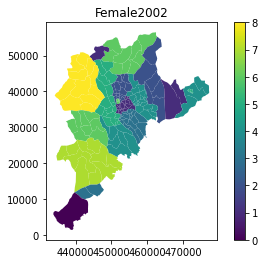

In [22]:
geo_df.plot(column='SCODE', legend=True)
plt.title('Female2002')

In [23]:
# Assigning centroids to the map
geo_df = geo_df.to_crs(4326)
x_map=geo_df.centroid.x.mean()
y_map=geo_df.centroid.y.mean()
print(x_map,y_map)

32.57617103481269 0.3219252345920108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In [24]:
Kla_inc_map = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
#folium.TileLayer('Stamen Terrain',name="Light Map",control=False).add_to(Kla_inc_map)
folium.TileLayer('Openstreetmap').add_to(Kla_inc_map)
folium.LayerControl



#Adding ALL boundaries of Kampala parishes
folium.Choropleth(geo_data=geo_df,
                    name="choropleth",

                      fill_opacity=0.2,
                     line_opacity=0.8,
                     ).add_to(Kla_inc_map)


# Adding in





Kla_inc_map  

# FILTERING ONLY KIRA MUNICIPALITY 

In [40]:
kira_geo =  geo_df[geo_df.SUBCOUNTY == "KIRA"]
type(kira_geo)

geopandas.geodataframe.GeoDataFrame

In [44]:
kira_geo['PARISH'].unique()

array(['KIRA', 'KYALIWAJALA', 'BWEYOGERERE', 'KIREKA', 'KIRINYA',
       'KIMWANYI'], dtype=object)

In [28]:
# Assigning centroids to the map
kira_geo = kira_geo.to_crs(4326)
x_map=kira_geo.centroid.x.mean()
y_map=kira_geo.centroid.y.mean()
print(x_map,y_map)

32.655653270516844 0.3796818988683161


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In [34]:
Kla_inc_map = folium.Map(location=[y_map, x_map], zoom_start=12,tiles=None)
#folium.TileLayer('Stamen Terrain',name="Light Map",control=False).add_to(Kla_inc_map)
folium.TileLayer('Openstreetmap').add_to(Kla_inc_map)
folium.LayerControl



#Adding ALL boundaries of Kampala parishes
folium.Choropleth(geo_data=kira_geo,
                    name="choropleth",

                      fill_opacity=0.2,
                     line_opacity=0.8,
                     ).add_to(Kla_inc_map)


# Adding in





Kla_inc_map  

# UPLOADING PM2.5 PER PARISH 

In [37]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kira-Monthly-data-CLEAN1.csv to kira-Monthly-data-CLEAN1.csv
User uploaded file "kira-Monthly-data-CLEAN1.csv" with length 4705 bytes


In [38]:
kira_aqi = pd.read_csv(fn)
kira_aqi.head()

,Unnamed: 0,Parish,month,latitude,longitude,pm2_5_mean,pm2_5_min,pm2_5_max
0,0,Bukasa,April,0.29875,32.615,34.367526,9.04,117.48
1,1,Bukasa,August,0.29875,32.615,45.725527,14.06,127.36
2,2,Bukasa,December,0.29875,32.615,34.781383,9.18,135.10
3,3,Bukasa,February,0.29875,32.615,42.107840,7.66,211.64
4,4,Bukasa,January,0.29875,32.615,50.122636,13.34,170.88


# From shape file get filter 
only required  data

In [45]:
kira_geo=kira_geo[['PARISH','geometry']]

kira_geo.shape

(6, 2)

In [46]:
kira_geo.head()

,PARISH,geometry
4,KIRA,"POLYGON ((462339.463 47880.487, 462324.650 478..."
6,KYALIWAJALA,"POLYGON ((462741.314 45943.572, 462745.876 459..."
12,BWEYOGERERE,"POLYGON ((463664.205 43457.068, 464602.253 414..."
15,KIREKA,"POLYGON ((459161.751 41970.798, 459160.501 421..."
33,KIRINYA,"POLYGON ((461533.886 38169.680, 461547.105 381..."


In [47]:
kira_geo['PARISH'].unique()

array(['KIRA', 'KYALIWAJALA', 'BWEYOGERERE', 'KIREKA', 'KIRINYA',
       'KIMWANYI'], dtype=object)

In [51]:
kira_aqi['Parish'].unique()

array(['Bukasa', 'Buwate', 'Bweyogerere', 'Kireka', 'Kirinya',
       'Kyaliwajala', 'Nsasa', 'Nsawo'], dtype=object)

In [113]:
kira_aqi=kira_aqi.replace(to_replace ="Buwate",
                 value ="Kira")

In [114]:
kira_aqi['Parish'].unique()

array(['BUKASA', 'KIRA', 'BWEYOGERERE', 'KIREKA', 'KIRINYA',
       'KYALIWAJALA', 'NSASA', 'NSAWO'], dtype=object)

In [64]:
# RENAME COLUMN
kira_aqi = kira_aqi.rename(columns={'Parish': 'PARISH'})

# FILTERING KIRA AQI Per month


In [117]:
# FILTERING KIRA AQI Per month
kira_aqi =  kira_aqi[kira_aqi.month == "January"]
type(kira_aqi)

# CONVERT PARISH to upper case
kira_aqi['PARISH']=kira_aqi['PARISH'].str.upper()
kira_aqi

,Unnamed: 0,PARISH,month,latitude,longitude,pm2_5_mean,pm2_5_min,pm2_5_max
4,4,BUKASA,January,0.298750,32.615000,50.122636,13.34,170.88
14,14,KIRA,January,0.405320,32.620270,51.714958,15.02,154.34
20,20,BWEYOGERERE,January,0.350100,32.666200,51.674685,18.12,142.87
27,27,KIREKA,January,0.347014,32.649360,51.747500,18.12,151.37
34,34,KIRINYA,January,0.331970,32.669030,51.708191,14.79,186.92
43,43,KYALIWAJALA,January,0.381576,32.647109,47.292738,16.17,170.88
54,54,NSASA,January,0.417870,32.656890,51.263693,12.38,142.87
63,63,NSAWO,January,0.392050,32.672960,51.672281,15.28,144.91


# Merge the two files

In [118]:
# Merge and create a geopandas dataframe
kirageo_aqi=kira_geo.merge(kira_aqi,on="PARISH")
kirageo_aqi

,PARISH,geometry,Unnamed: 0,month,latitude,longitude,pm2_5_mean,pm2_5_min,pm2_5_max
0,KIRA,"POLYGON ((462339.463 47880.487, 462324.650 478...",14,January,0.405320,32.620270,51.714958,15.02,154.34
1,KYALIWAJALA,"POLYGON ((462741.314 45943.572, 462745.876 459...",43,January,0.381576,32.647109,47.292738,16.17,170.88
2,BWEYOGERERE,"POLYGON ((463664.205 43457.068, 464602.253 414...",20,January,0.350100,32.666200,51.674685,18.12,142.87
3,KIREKA,"POLYGON ((459161.751 41970.798, 459160.501 421...",27,January,0.347014,32.649360,51.747500,18.12,151.37
4,KIRINYA,"POLYGON ((461533.886 38169.680, 461547.105 381...",34,January,0.331970,32.669030,51.708191,14.79,186.92


# Creating Choropleth Map

In [72]:
# Assigning centroids to the map
kirageo_aqi = kirageo_aqi.to_crs(4326)
x_map=kirageo_aqi.centroid.x.mean()
y_map=kirageo_aqi.centroid.y.mean()
print(x_map,y_map)

32.661045938021644 0.3530770801267598


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


In [ ]:
# Creating choropleth map

Kla_inc_map.choropleth(geo_data=kirageo_aqi,
             name='Choropleth',         
             data=kirageo_aqi,
             columns=['PARISH','pm2_5_mean'], 
             key_on='feature.properties.PARISH', 
             fill_color='YlGn',
             fill_opacity=0.5, 
             line_opacity=0.8,
          #   threshold_scale=scale,     
             legend_name='Pollution (%) IN JANUAR', 
             smooth_factor=0,     
             highlight=True
                 )

# Adding informative lables to the map using geoJson

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.1, 
                                'weight': 0.1}




# Highlighting the map
NIL = folium.features.GeoJson(
    kirageo_aqi,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PARISH','pm2_5_mean'],
        aliases=['PARISH: ','PM : '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
Kla_inc_map.add_child(NIL)
Kla_inc_map.keep_in_front(NIL)

Kla_inc_map    

# Adding informative lables to the map using geoJson

In [119]:
 

mymap = folium.Map(location=[y_map, x_map], zoom_start=12,tiles=None)
#folium.TileLayer('Stamen Terrain',name="Light Map",control=False).add_to(Kla_inc_map)
folium.TileLayer('Openstreetmap').add_to(mymap)
folium.LayerControl

###


#Adding ALL boundaries of Kampala parishes
folium.Choropleth(geo_data=kira_geo,
                    name="choropleth",

                      fill_opacity=0.2,
                     line_opacity=0.8,
                     ).add_to(mymap)


#
# ploting MERGED DATA
myscale = (kirageo_aqi['pm2_5_mean'].quantile((0,0.1,0.75,0.9,0.98,1))).tolist()
mymap.choropleth(
 geo_data=kirageo_aqi,
 name='Choropleth',
 data=kirageo_aqi,
 columns=['PARISH','pm2_5_mean'],
 key_on="feature.properties.PARISH",
 fill_color='YlGnBu',
 threshold_scale=myscale,
 fill_opacity=0.8,
 line_opacity=0.2,
 legend_name='Resident foreign population in %',
 smooth_factor=0
)


# HIGH LIGHT
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    kirageo_aqi,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PARISH','pm2_5_mean'],
        aliases=['PARISH: ','Mean PM: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)

#######
#folium.LayerControl().add_to(m)

for index, location_info in kira_aqi.iterrows():
    folium.Marker([location_info["latitude"], 
                   location_info["longitude"]], 
                  popup=location_info["PARISH"]
                  ).add_to(mymap)





mymap

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
